## Introduction
New York City has published data on student SAT scores by high school, along with additional demographic data sets. This dataset is a combination of following cleaned datasets:

- **SAT scores by school**- SAT scores for each high school in New York City. Here is the link: https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4

- **School attendance** - Attendance information for each school in New York City. Here is the Link: https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt

- **Class size** - Information on class size for each school. Here is the Link: https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3

- **AP test results** - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject). Here is the Link: https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e

- **Graduation outcomes** - The percentage of students who graduated, and other outcome information. Here is the Link:https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a 

- **Demographics** - Demographic information for each school. Here is the Link: https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j

- **School survey** - Surveys of parents, teachers, and students at each school. Here is the Link: https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8

## Objective
New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test.

## Import Libraries and Read in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import matplotlib.style as style

In [2]:

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

## Load the Datasets (surveys)

In [3]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

In [4]:
data['survey']

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,90.0,58,48,38.0,46.0,160.0,8.9,8.3,7.9,...,5.7,5.8,6.8,6.0,7.8,7.6,7.4,6.6,7.1,7.2
52,75X721,84.0,90,48,237.0,82.0,239.0,8.6,7.6,7.5,...,6.7,7.0,7.8,7.2,7.8,7.9,8.0,7.1,7.3,7.6
53,75X723,77.0,74,20,103.0,69.0,74.0,8.4,7.8,7.8,...,6.7,7.6,6.7,7.2,7.7,7.7,7.6,7.4,7.4,7.7
54,75X754,63.0,93,22,336.0,82.0,124.0,8.3,7.5,7.5,...,6.6,7.1,6.8,6.6,7.6,7.7,7.2,6.9,7.3,7.5


## Add DBN columns
A DBN is a District Borough Number which is a unique identifier for every school in the area

In [5]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

## Convert columns to numeric

- Convert the numerical columns from objects to integers
- As location feature is of importance in our dataset, extract the latitudes and longitudes

In [6]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

## Filter the datasets
- The class size will be reduced to 9-12 Graders and only for Gen Ed program
- The demographics will be reduced to year 2011-2012
- Other changes

In [8]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

## Convert AP scores to numeric
- AP scores to be converted back to numerical values 

In [9]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

## Combine the datasets
Merge the datasets 

In [10]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

## Add a school district column for mapping

In [11]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

## Find correlations
Find correlations of features with *sat_score*

In [12]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
priority08                              NaN
priority09                              NaN
priority10                              NaN
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 67, dtype: float64


### Plotting survey correlations

In [13]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

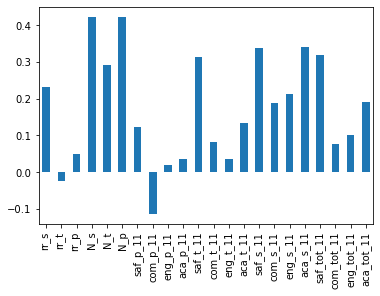

In [14]:
combined.corr()['sat_score'][survey_fields].plot.bar()

**Oberservations:**
- Highest correlations can be seen between *N_s* : **Number of student respondents**, *N_t*: **Number of teacher respondents**, *N_p*: **Number of parents respondents** and the *sat_score*. 

- It is more interesting that *rr_s*, **the student response rate**, correlates with *sat_score*. In contrast *rr_t*: **the teacher response rate** shows negative correlation with *sat_score*. *rr_p* shows very light yet positive correlation with *sat_score*

- *(saf_t_11, saf_s_11 and saf_p_11)*: How **students and teachers and parents percieved safety and respect** correlate with *sat_score*. 

- *aca_s_11*: **Academic Expectations score by students**, positively correlates with *sat_score*. Whereas *aca_t_11*: **Academic Expectations score by Teachers**, and *aca_p_11*, **Academic Expectations score by Parents** correlate weakly and negatively, respectively with the *sat_score*.

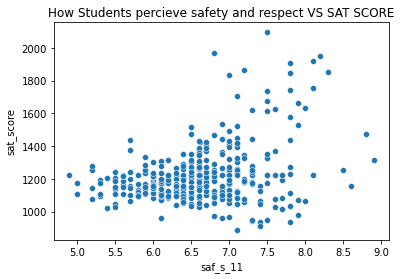

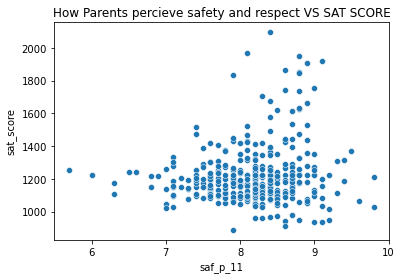

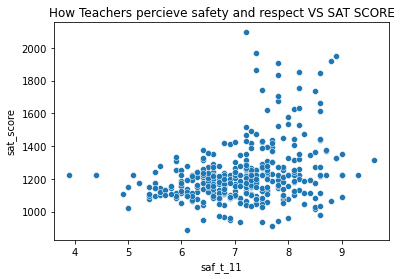

In [15]:
sns.scatterplot(x=combined["saf_s_11"], y=combined["sat_score"])
plt.title('How Students percieve safety and respect VS SAT SCORE')
plt.show()

sns.scatterplot(x=combined["saf_p_11"], y=combined["sat_score"])
plt.title('How Parents percieve safety and respect VS SAT SCORE')
plt.show()

sns.scatterplot(x=combined["saf_t_11"], y=combined["sat_score"])
plt.title('How Teachers percieve safety and respect VS SAT SCORE')
plt.show()

- Teachers perception about safety and respect looks most correlated with the *sat_score*

### Population and SAT scores

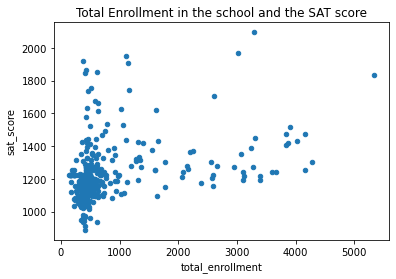

In [16]:
combined.plot.scatter(x='total_enrollment', y='sat_score', )
plt.title('Total Enrollment in the school and the SAT score')
plt.show()

- We can observe that schools with low enrollements posted low SAT score. However, the contrary can not be said to be True

### Race and SAT scores

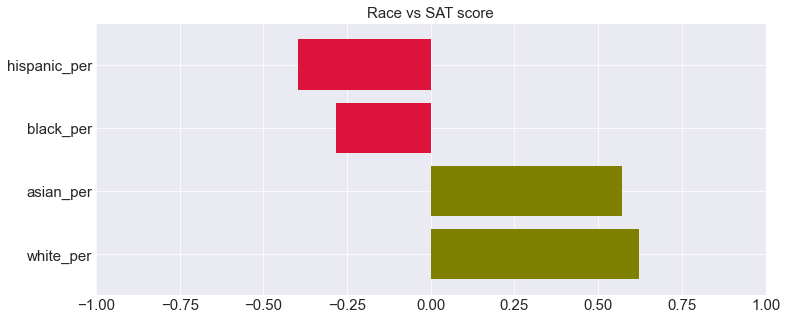

In [17]:
style.use('seaborn-darkgrid')
score_by_race = ['white_per', 'asian_per', 'black_per', 'hispanic_per', 'sat_score']
race = ['white_per', 'asian_per', 'black_per', 'hispanic_per']

corr_race = combined[score_by_race].corr()
corr_sat = corr_race['sat_score']
corr_sat = corr_sat[race]

pos_corr = corr_sat > 0 
fig = plt.figure(figsize=(12,5))
ax = corr_sat.plot.barh(fontsize=15, width=0.8, color=pos_corr.map({True: 'olive', False: 'crimson'}))
ax.set_title("Race vs SAT score", size=15)
ax.set_xlim(-1,1)
for side in ['left', 'right', 'bottom']:
    ax.spines[side].set_visible(False)
plt.show()

- A considerably high percentages of students of **white and asian** ethnicities perform better by positively correlating to the sat scores than **blacks and hispanic races**

##### Considering Hispanic Students' case 

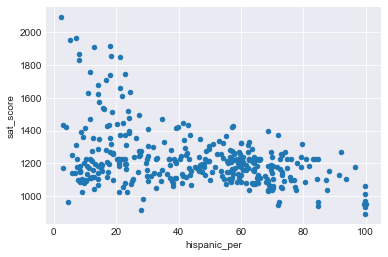

In [18]:
combined.plot.scatter(x='hispanic_per', y='sat_score')

- We can see that as the percentage of hispanic students increases, the sat_score decreases considerably

In [19]:
# Schools with hispanic_per > 95%
hispanic_bool1 = combined['hispanic_per'] > 95
combined[hispanic_bool1]['SCHOOL NAME']

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

In [46]:
# Schools with hispanic < 10%
combined[combined['hispanic_per'] < 10]['SCHOOL NAME'].head(10)

37                                STUYVESANT HIGH SCHOOL
46       HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
192                          BEDFORD ACADEMY HIGH SCHOOL
194                            BENJAMIN BANNEKER ACADEMY
220                           BOYS AND GIRLS HIGH SCHOOL
223    ACADEMY FOR COLLEGE PREPARATION AND CAREER EXP...
226               THE HIGH SCHOOL FOR GLOBAL CITIZENSHIP
227                         SCHOOL FOR HUMAN RIGHTS, THE
Name: SCHOOL NAME, dtype: object

### Gender and SAT scores

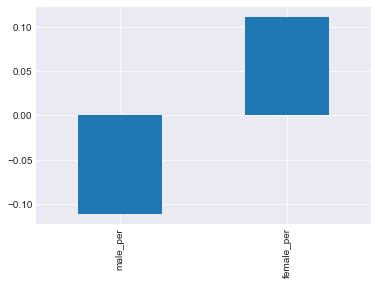

In [21]:
gender = ["male_per", "female_per"]
combined.corr()["sat_score"][gender].plot.bar()

- Very Weak Correlations shown by both genders towards the scores with higher percentages of males correlating negatively (around -0.11) whereas higher percentages of females correlates positively (around 0.11) with *sat_score*

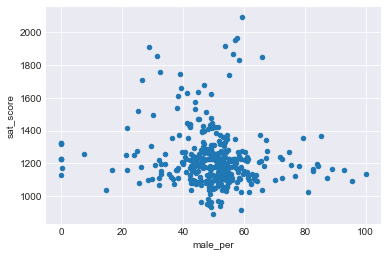

In [22]:
combined.plot.scatter(x="male_per", y="sat_score")
plt.show()

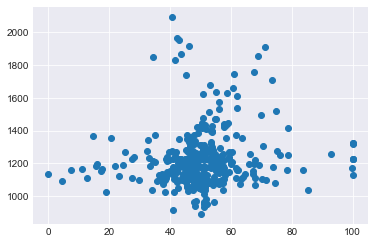

In [23]:
plt.scatter(x ='female_per', y='sat_score', data=combined)
plt.show()

- We can say that the balanced between the genders is tied to higher SAT scores

In [49]:
female_bool = combined['female_per'] > 60
score_bool = combined['sat_score'] > 1700

combined[female_bool & score_bool][['SCHOOL NAME', 'sat_score', 'female_per']]


,SCHOOL NAME,sat_score,female_per
5,BARD HIGH SCHOOL EARLY COLLEGE,1856.0,68.7
26,ELEANOR ROOSEVELT HIGH SCHOOL,1758.0,67.5
60,BEACON HIGH SCHOOL,1744.0,61.0
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,1707.0,73.6
302,TOWNSEND HARRIS HIGH SCHOOL,1910.0,71.1


These schools are mainly liberal arts schools 

### Class Size and SAT Scores

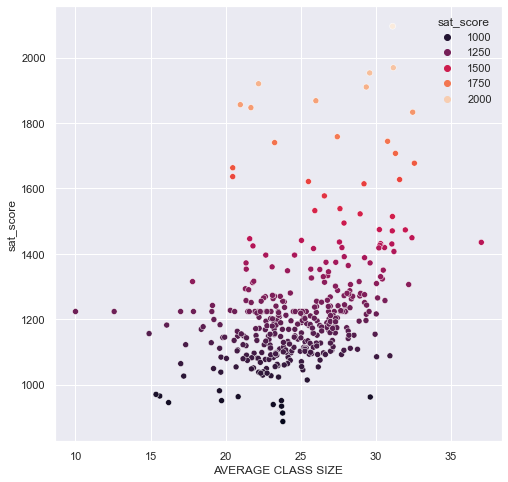

In [88]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='AVERAGE CLASS SIZE', y='sat_score', data=combined,
                palette='rocket', hue='sat_score')

- We can see that there is no such strong correlation between *AVERAGE CLASS SIZE*: **The average class size** and the sat_score. The best SAT scores came out from the classes with sizes between 20-33 students

In [52]:
class_size_wise = combined[(combined['AVERAGE CLASS SIZE'] > 20) & (combined['AVERAGE CLASS SIZE'] < 33)]
class_size_wise.sort_values(by='sat_score', ascending=False)[['SCHOOL NAME', 'AVERAGE CLASS SIZE', 'sat_score']]

,SCHOOL NAME,AVERAGE CLASS SIZE,sat_score
37,STUYVESANT HIGH SCHOOL,31.115789,2096.0
151,BRONX HIGH SCHOOL OF SCIENCE,31.163158,1969.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,29.588235,1953.0
155,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,22.189474,1920.0
302,TOWNSEND HARRIS HIGH SCHOOL,29.362500,1910.0
...,...,...,...
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,23.714286,951.0
179,HIGH SCHOOL OF WORLD CULTURES,23.166667,939.0
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,23.723077,934.0
225,INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS,23.792308,913.0


### AP exam and SAT scores

In [25]:
# Add a new column in combined to express the ratio of AP exam takers
combined['ap_per'] = combined['AP Test Takers ']/combined['total_enrollment']

Text(0.5, 1.0, 'AP takers and SAT scores')

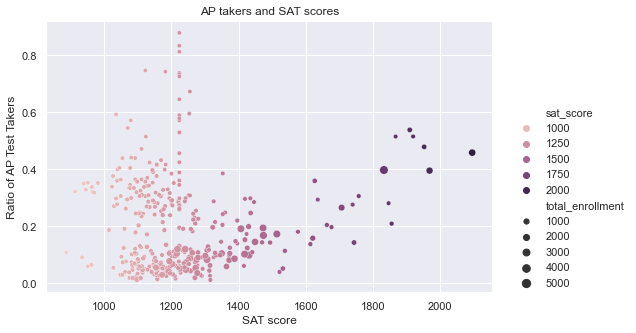

In [83]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,5))
sns.scatterplot(x='sat_score', y='ap_per', size='total_enrollment', hue='sat_score', data=combined)
plt.legend(loc=(1.04,0))
plt.xlabel('SAT score')
plt.ylabel('Ratio of AP Test Takers')
plt.title('AP takers and SAT scores')

It looks like that there are some haphazard relations between the AP test takers and *sat_score*. There seems to be a positive correlation for SAT scores > 1450

#### Lets check for the SAT scores above 1450

In [60]:
score_bool = combined['sat_score'] > 1450
score_wise = combined[score_bool][['SCHOOL NAME' ,'ap_per', 'sat_score',]].sort_values(by='ap_per', ascending=False)
score_wise.head()

,SCHOOL NAME,ap_per,sat_score
302,TOWNSEND HARRIS HIGH SCHOOL,0.537719,1910.0
155,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,0.514589,1920.0
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,0.514354,1868.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,0.478261,1953.0
37,STUYVESANT HIGH SCHOOL,0.457992,2096.0


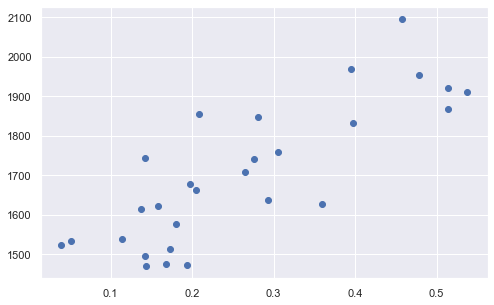

Correlation:
              ap_per  sat_score
ap_per     1.000000   0.817398
sat_score  0.817398   1.000000


In [84]:
plt.figure(figsize=(8,5))

plt.scatter(x=score_wise['ap_per'], y=score_wise['sat_score'])
plt.show()
print('Correlation:\n', score_wise.corr())

- There is **very High** Correlaion between *ap_per* and *sat_score* FOR SAT scores above 1450

### Borough Safety Scores and SAT Scores

In [30]:
boro_wise = combined.groupby('boro').agg(np.mean)
boro_wise['saf_s_11'].sort_values(ascending=False)

boro
Manhattan        6.831370
Queens           6.721875
Bronx            6.606577
Staten Island    6.530000
Brooklyn         6.370755
Name: saf_s_11, dtype: float64

Manhattan and Queens have the highest safety scores, whereas Brooklyn has the lowest safety score among all the boroughs

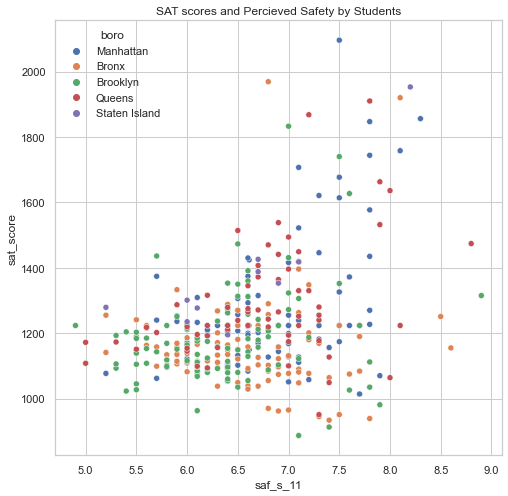

In [80]:
plt.figure(figsize=(8,8))

sns.scatterplot(x = combined["saf_s_11"], y = combined["sat_score"], hue = combined["boro"])
plt.title("SAT scores and Percieved Safety by Students")
plt.show()

- Perception of safety and respect has an overall impact on the SAT scores. However, there is no such strong relation

### Financial Status and Sat Scores

Correlation;
 -0.7222246349966344


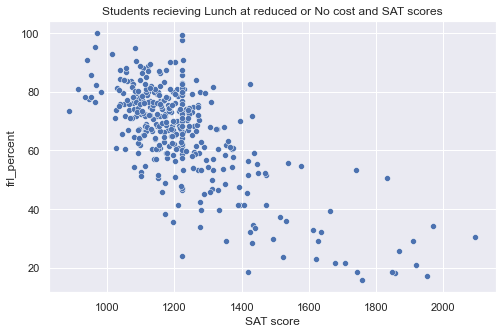

In [94]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sat_score', y='frl_percent', data=combined)
plt.xlabel('SAT score')
plt.ylabel('frl_percent')
plt.title('Students recieving Lunch at reduced or No cost and SAT scores')

print('Correlation;\n', combined['sat_score'].corr(combined['frl_percent']))

- There is a High Negative Correlation between financial status of a student inferred by the student's Lunch package called *frl_percent* and the *sat_score*

**CONCLUSIONS:**
1. SAT scores are highly correlated with its subparts i-e, Critical Reading, Writing and Maths

2. Perception of Safety and Respect has also an impact on the SAT scores. However, it is not very strong.

3. Students in Schools with Low enrollments usually struggle to post SAT scores higher than 1500.

4. SAT scores have an impact of Racial distinctions as well. Schools with higher White and Asian students correlates positively with SAT scores. And schools with higher Black and Hispanic students have a negative bond with SAT scores

5. Gender do not play a considerable part in SAT scores

6. Only the schools with Class sizes of 20-33 students could garner SAT scores above 1600

7. AP scores share an interesting relation with SAT scores. There is a haphazard relation but for SAT score of 1450 and above, AP scores correlates tremendously positive.

8. Borough Safety does not have considerable impact on SAT scores

9. Financial status of a student, that we inferred from the students' participation in Redudced-Cost or Free Lunch packages has a High role to play with SAT Scores. There is a very strong negative Correlation     